# MFLI

We use the `tk.MFLI` instrument driver for the MFLI Lock-In amplifier.

In [1]:
import zhinst.toolkit as tk

mfli = tk.MFLI("mf1", "dev3337", interface="pcie", host="10.42.3.78")
mfli.setup() # set up data server connection
mfli.connect_device() # connect device to data server

Successfully connected to data server at 10.42.3.788004 api version: 6
Successfully connected to device DEV3337 on interface PCIE


## Nodetree

Access the MFLI's nodetree:

In [2]:
mfli.nodetree

nodes:
 - stats
 - oscs
 - demods
 - extrefs
 - triggers
 - status
 - dio
 - auxin
 - scope
 - system
 - sigin
 - currin
 - sigout
 - mod
 - pids
 - features
 - auxouts
 - tu
 - imps
parameters:
 - clockbase

The `Parameter` *sample* of the demodulators uses the `getSample(...)` method of the *ziPython* API to read the latest sample of the demodulator. 

In [3]:
mfli.nodetree.demods[0].sample()

(1.7865198904313488e-07-5.620227793044149e-07j)

> ⚠️ Note that this parameter only returns a *single* sample. There is no guarantee for any precise time-relation between consecutive samples. For proper (triggered) data acquisition of signals aligned to a precise time-grid, please use the *Data Acquisition Module* (see below).

## The *Data Acquisition Module* of the MFLI

The MFLI comes with a *Data Acquisition Module* for precise (triggered) measurements. For more details on the *Data Acquisition Module* please see the according example.

In [4]:
mfli.daq


signals:
parameters:
 - awgcontrol
 - bandwidth
 - bitmask
 - bits
 - buffercount
 - buffersize
 - clearhistory
 - count
 - delay
 - device
 - duration
 - edge
 - enable
 - endless
 - eventcount_mode
 - fft_absolute
 - fft_window
 - findlevel
 - flags
 - forcetrigger
 - grid_cols
 - grid_direction
 - grid_mode
 - grid_overwrite
 - grid_repetitions
 - grid_rowrepetition
 - grid_rows
 - grid_waterfall
 - historylength
 - holdoff_count
 - holdoff_time
 - hysteresis
 - level
 - preview
 - pulse_max
 - pulse_min
 - refreshrate
 - save_csvlocale
 - save_csvseparator
 - save_directory
 - save_fileformat
 - save_filename
 - save_save
 - save_saveonread
 - spectrum_autobandwidth
 - spectrum_enable
 - spectrum_frequencyspan
 - spectrum_overlapped
 - triggered
 - triggernode
 - type

List available sources of streaming signals ...

In [5]:
mfli.daq.signals_list()

['dio0',
 'auxin0',
 'scope0',
 'demod0',
 'demod1',
 'demod2',
 'demod3',
 'pid0_value',
 'pid0_error',
 'pid0_shift',
 'pid1_value',
 'pid1_error',
 'pid1_shift',
 'pid2_value',
 'pid2_error',
 'pid2_shift',
 'pid3_value',
 'pid3_error',
 'pid3_shift',
 'imp0',
 'imp1']

... and different signal types for a given source.

In [6]:
mfli.daq.signals_list("demod0")

['x', 'y', 'r', 'xiy', 'theta', 'frequency', 'auxin0', 'auxin1', 'dio']

Use the method `signals_add(..)` to specify which signals should be acquired during a measurement. The return value gives the exact node path that will be subscribed to before the measurement.

In [7]:
signal1 = mfli.daq.signals_add("demod0", "x")
signal2 = mfli.daq.signals_add("demod0", "y")

# which signal nodes have been added?
print(mfli.daq.signals)

['/dev3337/demods/0/sample.x.avg', '/dev3337/demods/0/sample.y.avg']


Use *trigger type*, *grid columns*, *grid rows* and other parameters to configure the measurement you want.

In [8]:
mfli.daq.type("continuous")
mfli.daq.grid_cols(100)
mfli.daq.grid_rows(100)

100

The measurement routine starts using the `measure(...)` method. At first, the mdoule will subscribe to the signal nodes that were previously added to the measurement. Then the measurement starts. When it is finished, the results will be added to the `results` property of the `daq` Module. 

In [9]:
mfli.daq.measure()

subscribed to: /dev3337/demods/0/sample.x.avg
subscribed to: /dev3337/demods/0/sample.y.avg
Progress: 0.0%
Progress: 1.0%
Progress: 7.0%
Progress: 18.0%
Progress: 26.0%
Progress: 34.0%
Progress: 42.0%
Progress: 49.0%
Progress: 60.0%
Progress: 67.0%
Progress: 75.0%
Progress: 81.0%
Progress: 89.0%
Finished


The results property is a dictionary with the exact signal node as its keys. The return value from `signals_add(..)` can be used to access the result of that signal. The value in the dictionary is a `DAQResult` object that contains all measurement information such as the measurement values, the time- or frequency-axis as well as meta-information.

In [10]:
mfli.daq.results[signal1]


path:        /dev3337/demods/0/sample.x.avg
value:       (100, 100)
time:        (100,)

In [11]:
mfli.daq.results[signal2]


path:        /dev3337/demods/0/sample.y.avg
value:       (100, 100)
time:        (100,)

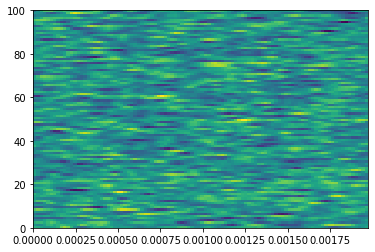

In [13]:
import matplotlib.pyplot as plt

result1 = mfli.daq.results[signal1]

plt.imshow(result1.value, extent=[result1.time[0], result1.time[-1], 0, 100], aspect="auto")
plt.show()

## The *Sweeper Module* of the MFLI 

The MFLI also features a *Sweeper Module*. For more details on the *Sweeper Module* please see the according example. The module has all of the following *Parameters*:

In [14]:
mfli.sweeper


signals:
parameters:
 - averaging_sample
 - averaging_tc
 - averaging_time
 - awgcontrol
 - bandwidth
 - bandwidthcontrol
 - bandwidthoverlap
 - clearhistory
 - device
 - endless
 - gridnode
 - historylength
 - loopcount
 - maxbandwidth
 - omegasuppression
 - order
 - phaseunwrap
 - remainingtime
 - samplecount
 - save_csvlocale
 - save_csvseparator
 - save_directory
 - save_fileformat
 - save_filename
 - save_save
 - save_saveonread
 - scan
 - settling_inaccuracy
 - settling_tc
 - settling_time
 - sincfilter
 - start
 - stop
 - xmapping

As for the *Data Acquisition Module* the available signal sources can be shown with `signals_list(...)`. They can differ depending on the options installed in the instrument.

In [15]:
mfli.sweeper.signals_list()

['dio0',
 'auxin0',
 'scope0',
 'demod0',
 'demod1',
 'demod2',
 'demod3',
 'pid0_value',
 'pid0_error',
 'pid0_shift',
 'pid1_value',
 'pid1_error',
 'pid1_shift',
 'pid2_value',
 'pid2_error',
 'pid2_shift',
 'pid3_value',
 'pid3_error',
 'pid3_shift',
 'imp0',
 'imp1']

The *Parameters* that are available for sweeping can be listed with `sweep_parameter_list()`.

In [17]:
mfli.sweeper.sweep_parameter_list()

['auxout1offset',
 'auxout2offset',
 'auxout3offset',
 'auxout4offset',
 'demdod1phase',
 'demdod2phase',
 'frequency',
 'output1amp',
 'output1offset']